In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
parking_df = pd.read_csv('/content/MyDrive/MyDrive/실전db.csv')
weather_df = pd.read_csv('/content/MyDrive/MyDrive/서울시_기상데이터.csv', encoding="cp949")
traffic = pd.read_excel('/content/MyDrive/MyDrive/2020교통량통합.xlsx')

In [ ]:
parking_df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [ ]:
weather_df

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0
...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,NaN,4.8,54,NaN,NaN,-6.5,2.2
8756,108,2020-12-30 21:00,-12.4,NaN,3.2,58,NaN,NaN,-6.9,2.2
8757,108,2020-12-30 22:00,-12.7,NaN,2.8,56,NaN,NaN,-7.1,2.1
8758,108,2020-12-30 23:00,-12.9,NaN,2.2,54,NaN,NaN,-7.3,2.1


In [ ]:
weather_df.isna().sum()

지점         0
일시         0
기온         1
강수량     7701
풍속         0
습도         0
일조시간    3969
적설량     8552
지면온도       8
지중온도      12
dtype: int64

In [ ]:
weather_df['지점'].unique() # 기상청 통계 데이터에서 108은 서울지점을 의미

array([108])

In [ ]:
weather_df["날짜"] = weather_df["일시"].astype(str).str[:10]
weather_df["날짜"] = pd.to_datetime(weather_df["날짜"])
weather_df['월'] = weather_df['날짜'].dt.month

w1 = weather_df[weather_df['월']==1]
w2 = weather_df[weather_df['월']==2]
w3 = weather_df[weather_df['월']==3]
w4 = weather_df[weather_df['월']==4]
w5 = weather_df[weather_df['월']==5]
w6 = weather_df[weather_df['월']==6]
w7 = weather_df[weather_df['월']==7]
w8 = weather_df[weather_df['월']==8]
w9 = weather_df[weather_df['월']==9]
w10 = weather_df[weather_df['월']==10]
w11 = weather_df[weather_df['월']==11]
w12 = weather_df[weather_df['월']==12]

In [ ]:
# 기상청 20년 월별 데이터 평균값으로 채움

w1['강수량'] = w1['강수량'].fillna(60.5)
w1['일조시간'] = w1['일조시간'].fillna(177.9)
w1['적설량'] = w1['적설량'].fillna(0.3)

w2['강수량'] = w2['강수량'].fillna(53.1)
w2['일조시간'] = w2['일조시간'].fillna(185.0)
w2['적설량'] = w2['적설량'].fillna(3.9)
w2['지면온도'] = w2['지면온도'].fillna(0.8)
w2['지중온도'] = w2['지중온도'].fillna(1.9)

w3['강수량'] = w3['강수량'].fillna(16.3)
w3['일조시간'] = w3['일조시간'].fillna(262.9)
w3['적설량'] = w3['적설량'].fillna(0.0)

w4['강수량'] = w4['강수량'].fillna(16.9)
w4['일조시간'] = w4['일조시간'].fillna(283.3)
w4['적설량'] = w4['적설량'].fillna(0.0)

w5['강수량'] = w5['강수량'].fillna(112.4)
w5['일조시간'] = w5['일조시간'].fillna(177.9)
w5['적설량'] = w5['적설량'].fillna(0.0)
w5['지중온도'] = w5['지중온도'].fillna(17.4)

w6['강수량'] = w6['강수량'].fillna(139.6)
w6['일조시간'] = w6['일조시간'].fillna(206.1)
w6['적설량'] = w6['적설량'].fillna(0.0)
w6['지면온도'] = w6['지면온도'].fillna(23.9)
w6['지중온도'] = w6['지중온도'].fillna(23.9)

w7['강수량'] = w7['강수량'].fillna(270.4)
w7['일조시간'] = w7['일조시간'].fillna(119.4)
w7['적설량'] = w7['적설량'].fillna(0.0)
w7['지면온도'] = w7['지면온도'].fillna(26.0)
w7['지중온도'] = w7['지중온도'].fillna(22.1)

w8['강수량'] = w8['강수량'].fillna(675.7)
w8['일조시간'] = w8['일조시간'].fillna(74.7)
w8['적설량'] = w8['적설량'].fillna(0.0)
w8['지면온도'] = w8['지면온도'].fillna(27.7)
w8['지중온도'] = w8['지중온도'].fillna(26.5)
w8['기온'] = w8['기온'].fillna(26.5)

w9['강수량'] = w9['강수량'].fillna(181.5)
w9['일조시간'] = w9['일조시간'].fillna(174.3)
w9['적설량'] = w9['적설량'].fillna(0.0)

w10['강수량'] = w10['강수량'].fillna(0.0)
w10['일조시간'] = w10['일조시간'].fillna(227.1)
w10['적설량'] = w10['적설량'].fillna(0.0)

w11['강수량'] = w11['강수량'].fillna(120.1)
w11['일조시간'] = w11['일조시간'].fillna(171.5)
w11['적설량'] = w11['적설량'].fillna(0.0)

w12['강수량'] = w12['강수량'].fillna(4.6)
w12['일조시간'] = w12['일조시간'].fillna(203.6)
w12['적설량'] = w12['적설량'].fillna(3.2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
weather = pd.concat([w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12])
weather

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,날짜,월
0,108,2020-01-01 1:00,-5.9,60.5,1.7,40,177.9,0.3,-2.4,3.2,2020-01-01,1
1,108,2020-01-01 2:00,-5.7,60.5,0.1,42,177.9,0.3,-2.4,3.1,2020-01-01,1
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,177.9,0.3,-2.7,3.1,2020-01-01,1
3,108,2020-01-01 4:00,-5.4,60.5,0.0,50,177.9,0.3,-2.5,3.0,2020-01-01,1
4,108,2020-01-01 5:00,-5.2,60.5,0.0,55,177.9,0.3,-2.2,3.0,2020-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,4.6,4.8,54,203.6,3.2,-6.5,2.2,2020-12-30,12
8756,108,2020-12-30 21:00,-12.4,4.6,3.2,58,203.6,3.2,-6.9,2.2,2020-12-30,12
8757,108,2020-12-30 22:00,-12.7,4.6,2.8,56,203.6,3.2,-7.1,2.1,2020-12-30,12
8758,108,2020-12-30 23:00,-12.9,4.6,2.2,54,203.6,3.2,-7.3,2.1,2020-12-30,12


In [ ]:
weather.isna().sum()

지점      0
일시      0
기온      0
강수량     0
풍속      0
습도      0
일조시간    0
적설량     0
지면온도    0
지중온도    0
날짜      0
월       0
dtype: int64

In [ ]:
daily_weather = weather.groupby("날짜").mean().drop('지점', axis=1)
print(daily_weather.shape) #2020년은 2월 29일이 있었으므로 366 row (o)
daily_weather.head()

(366, 9)


,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,월
날짜,,,,,,,,,
2020-01-01,-2.543478,49.982609,1.152174,62.739130,92.852174,0.286957,-0.917391,2.856522,1.0
2020-01-02,0.987500,60.500000,1.912500,64.875000,96.362500,0.300000,-0.020833,2.625000,1.0
2020-01-03,0.120833,60.500000,1.879167,57.833333,96.729167,0.300000,-0.554167,2.683333,1.0
2020-01-04,1.054167,60.500000,1.895833,50.875000,96.691667,0.300000,-0.395833,2.695833,1.0
2020-01-05,1.175000,60.500000,1.045833,45.666667,96.658333,0.300000,-0.737500,2.629167,1.0


In [ ]:
print(traffic.shape)
traffic.isna().sum()

(98820, 29)


DATE       0
지점명        0
지점번호       0
방향         0
구분         0
0시      6835
1시      6858
2시      6860
3시      6841
4시      6821
5시      6784
6시      6741
7시      6725
8시      6739
9시      6710
10시     6676
11시     6720
12시     6753
13시     6788
14시     6767
15시     6754
16시     6727
17시     6753
18시     6741
19시     6786
20시     6780
21시     6797
22시     6996
23시     7122
dtype: int64

In [ ]:
traffic["total"] = traffic[['0시', '1시', '2시', '3시', '4시', '5시',
       '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시',
       '17시', '18시', '19시', '20시', '21시', '22시', '23시']].sum(axis=1)

In [ ]:
daily_traffic = traffic.groupby("DATE")["DATE", 'total'].sum()

print(daily_traffic.shape)
daily_traffic.head()

(366, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total
DATE,
2020-01-01,7347299.0
2020-01-02,9326734.0
2020-01-03,9998638.0
2020-01-04,9198233.0
2020-01-05,7868358.0


In [ ]:
daily_traffic = daily_traffic.reset_index("DATE")
daily_traffic.isna().sum()

DATE     0
total    0
dtype: int64

In [ ]:
daily_df = pd.merge(daily_traffic, daily_weather, left_on='DATE', right_on='날짜')
print(daily_df.shape)
daily_df

(366, 11)


,DATE,total,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,월
0,2020-01-01,7347299.0,-2.543478,49.982609,1.152174,62.739130,92.852174,0.286957,-0.917391,2.856522,1.0
1,2020-01-02,9326734.0,0.987500,60.500000,1.912500,64.875000,96.362500,0.300000,-0.020833,2.625000,1.0
2,2020-01-03,9998638.0,0.120833,60.500000,1.879167,57.833333,96.729167,0.300000,-0.554167,2.683333,1.0
3,2020-01-04,9198233.0,1.054167,60.500000,1.895833,50.875000,96.691667,0.300000,-0.395833,2.695833,1.0
4,2020-01-05,7868358.0,1.175000,60.500000,1.045833,45.666667,96.658333,0.300000,-0.737500,2.629167,1.0
...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,5606406.0,5.395833,4.408333,1.850000,63.125000,110.529167,3.200000,1.291667,1.683333,12.0
362,2020-12-28,8389535.0,6.920833,4.270833,1.441667,71.000000,110.616667,3.200000,3.108333,2.070833,12.0
363,2020-12-29,8523717.0,1.033333,4.033333,2.733333,71.958333,110.283333,3.200000,-0.133333,2.733333,12.0
364,2020-12-30,8455563.0,-10.366667,4.600000,4.037500,54.833333,110.629167,3.200000,-4.037500,2.416667,12.0


In [ ]:
daily_df['Weekday'] = daily_df['DATE'].dt.weekday # 0:월 1:화 2:수 3:목 4:금 5:토 6:일
daily_df

,DATE,total,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도,월,Weekday
0,2020-01-01,7347299.0,-2.543478,49.982609,1.152174,62.739130,92.852174,0.286957,-0.917391,2.856522,1.0,2
1,2020-01-02,9326734.0,0.987500,60.500000,1.912500,64.875000,96.362500,0.300000,-0.020833,2.625000,1.0,3
2,2020-01-03,9998638.0,0.120833,60.500000,1.879167,57.833333,96.729167,0.300000,-0.554167,2.683333,1.0,4
3,2020-01-04,9198233.0,1.054167,60.500000,1.895833,50.875000,96.691667,0.300000,-0.395833,2.695833,1.0,5
4,2020-01-05,7868358.0,1.175000,60.500000,1.045833,45.666667,96.658333,0.300000,-0.737500,2.629167,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,5606406.0,5.395833,4.408333,1.850000,63.125000,110.529167,3.200000,1.291667,1.683333,12.0,6
362,2020-12-28,8389535.0,6.920833,4.270833,1.441667,71.000000,110.616667,3.200000,3.108333,2.070833,12.0,0
363,2020-12-29,8523717.0,1.033333,4.033333,2.733333,71.958333,110.283333,3.200000,-0.133333,2.733333,12.0,1
364,2020-12-30,8455563.0,-10.366667,4.600000,4.037500,54.833333,110.629167,3.200000,-4.037500,2.416667,12.0,2


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


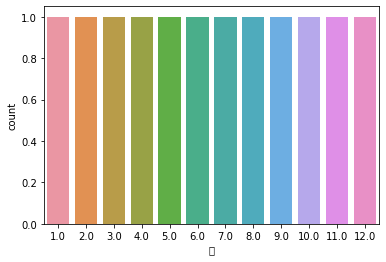

In [ ]:
d1 = daily_df.groupby('월')['total'].sum().reset_index()
sns.countplot(data=d1 ,x='월')

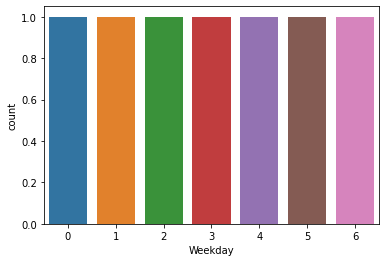

In [ ]:
d2 = daily_df.groupby('Weekday')['total'].sum().reset_index()
sns.countplot(data=d2, x='Weekday')

# 트래픽은 요일 / 월 변화량이 거의 없음

# 데이터 컬럼의미


1.   USER_ID: 유저ID

2.   JOIN_DATE: 가입일이라고 생각했는데 1970-01-01 이런식으로 70년대도 있어가지고 정확히 뭔지 모르겠음 주차장 운영시작일일수도 있음

3.   D_TYPE: 

4.   STORE_ID: 상점ID

5.   GOODS_TYPE: 주차장관련 어플이니깐 주차권타입???

6.   DATE: 결제일

7.   COUNT: 결제건수

8.   AD1: 매장 지역코드



In [ ]:
parking_df['JOIN_DATE'].sort_values()

176320    1970-01-01
625539    1970-01-01
226658    1970-01-01
226415    1970-01-01
226042    1970-01-01
             ...    
879214    2020-12-31
879213    2020-12-31
879212    2020-12-31
879230    2020-12-31
879270    2020-12-31
Name: JOIN_DATE, Length: 879271, dtype: object

In [ ]:
parking_df[parking_df['JOIN_DATE']=='1970-01-02'] # 1970-01-01 에러일 가능성이 높음

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1


In [ ]:
print(parking_df.shape) # 데이터의 행, 열 개수 출력
print(parking_df.dtypes) # 데이터의 타입 출력

(879271, 8)
USER_ID        int64
JOIN_DATE     object
D_TYPE        object
STORE_ID       int64
GOODS_TYPE    object
DATE          object
COUNT          int64
AD1           object
dtype: object


In [ ]:
parking_df.isna().sum() # NaN은 없음

USER_ID       0
JOIN_DATE     0
D_TYPE        0
STORE_ID      0
GOODS_TYPE    0
DATE          0
COUNT         0
AD1           0
dtype: int64

In [ ]:
parking_df.describe() # 컬럼별 요약 통계 지표 출력

,USER_ID,STORE_ID,COUNT
count,8.792710e+05,879271.000000,879271.000000
mean,1.206566e+06,149599.960642,1.029079
std,4.206529e+05,68898.035318,0.512428
min,2.240000e+02,4.000000,1.000000
25%,9.005760e+05,92437.000000,1.000000
50%,1.321440e+06,173059.000000,1.000000
75%,1.542416e+06,220661.000000,1.000000
max,1.830598e+06,231465.000000,61.000000


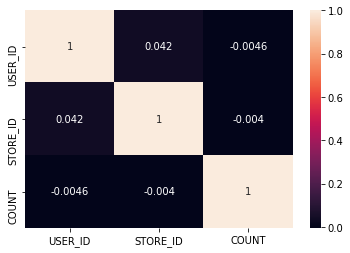

In [ ]:
sns.heatmap(parking_df.corr(), annot=True); # 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

In [ ]:
parking_df['JOIN_DATE'] = pd.to_datetime(parking_df['JOIN_DATE'])
parking_df['DATE'] = pd.to_datetime(parking_df['DATE'])

In [ ]:
parking_df['Weekday'] = parking_df['DATE'].dt.weekday # 0:월 1:화 2:수 3:목 4:금 5:토 6:일
parking_df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2
...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,3
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,3
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,3
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,3


In [ ]:
df = pd.merge(parking_df, daily_df, on = 'DATE')
print(df.shape)
col=['Weekday_y', '월']
df.drop(col, axis=1, inplace=True)
df.rename(columns={'Weekday_x':'Weekday','기온':'Temp', '강수량':'Rain', '풍속':'Wind',
                   '습도':'Hum', '일조시간':'Daylight', '적설량':'Snow',
                   '지면온도':'GTemp', '지중온도':'UnderTemp'}, inplace=True)

(879271, 20)


In [ ]:
df['Month']=df['DATE'].dt.month

# 전처리 방향


1.   D_TYPE 확실히 뭘 의미하는지 확인

2.   AD1 확실히 뭘 의미하는지 확인

3.   GOODS_TYPE 확실히 뭘 의미하는지 확인

4.   USER_ID 분석

5.   STORE_ID 분석

6.   COUNT 분석


# 1. D_TYPE & AD1 & GOODS_TYPE



# 어플을 확인했을 때 결제 방법으로 카드/ 휴대폰결제 / 네이버 페이 3가지 방법이 있었음 AA / BB / CC는 혹시 결제방법 아닐까??

In [ ]:
parking_df.groupby(['USER_ID','STORE_ID','Weekday'])['D_TYPE'].value_counts()

USER_ID  STORE_ID  Weekday  D_TYPE
224      92510     6        AA        1
         181833    2        AA        1
232      28018     0        BB        1
                   1        BB        1
                   5        BB        1
                                     ..
1830551  219886    3        BB        1
1830570  82433     3        BB        1
1830580  92020     3        AA        1
1830589  92437     3        BB        1
1830598  220959    3        AA        1
Name: D_TYPE, Length: 482081, dtype: int64

AA    493166
BB    384541
CC      1564
Name: D_TYPE, dtype: int64


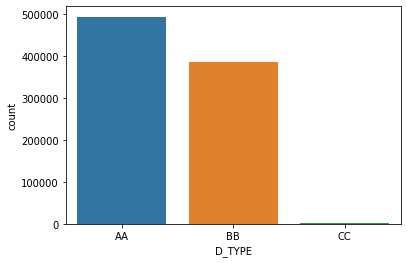

In [ ]:
print(parking_df['D_TYPE'].value_counts())
sns.countplot(data=parking_df, x='D_TYPE'); 

In [ ]:
parking_df['Month'] = parking_df['DATE'].dt.month

[Text(0.5, 1.0, 'Monthly changes by Temperature')]

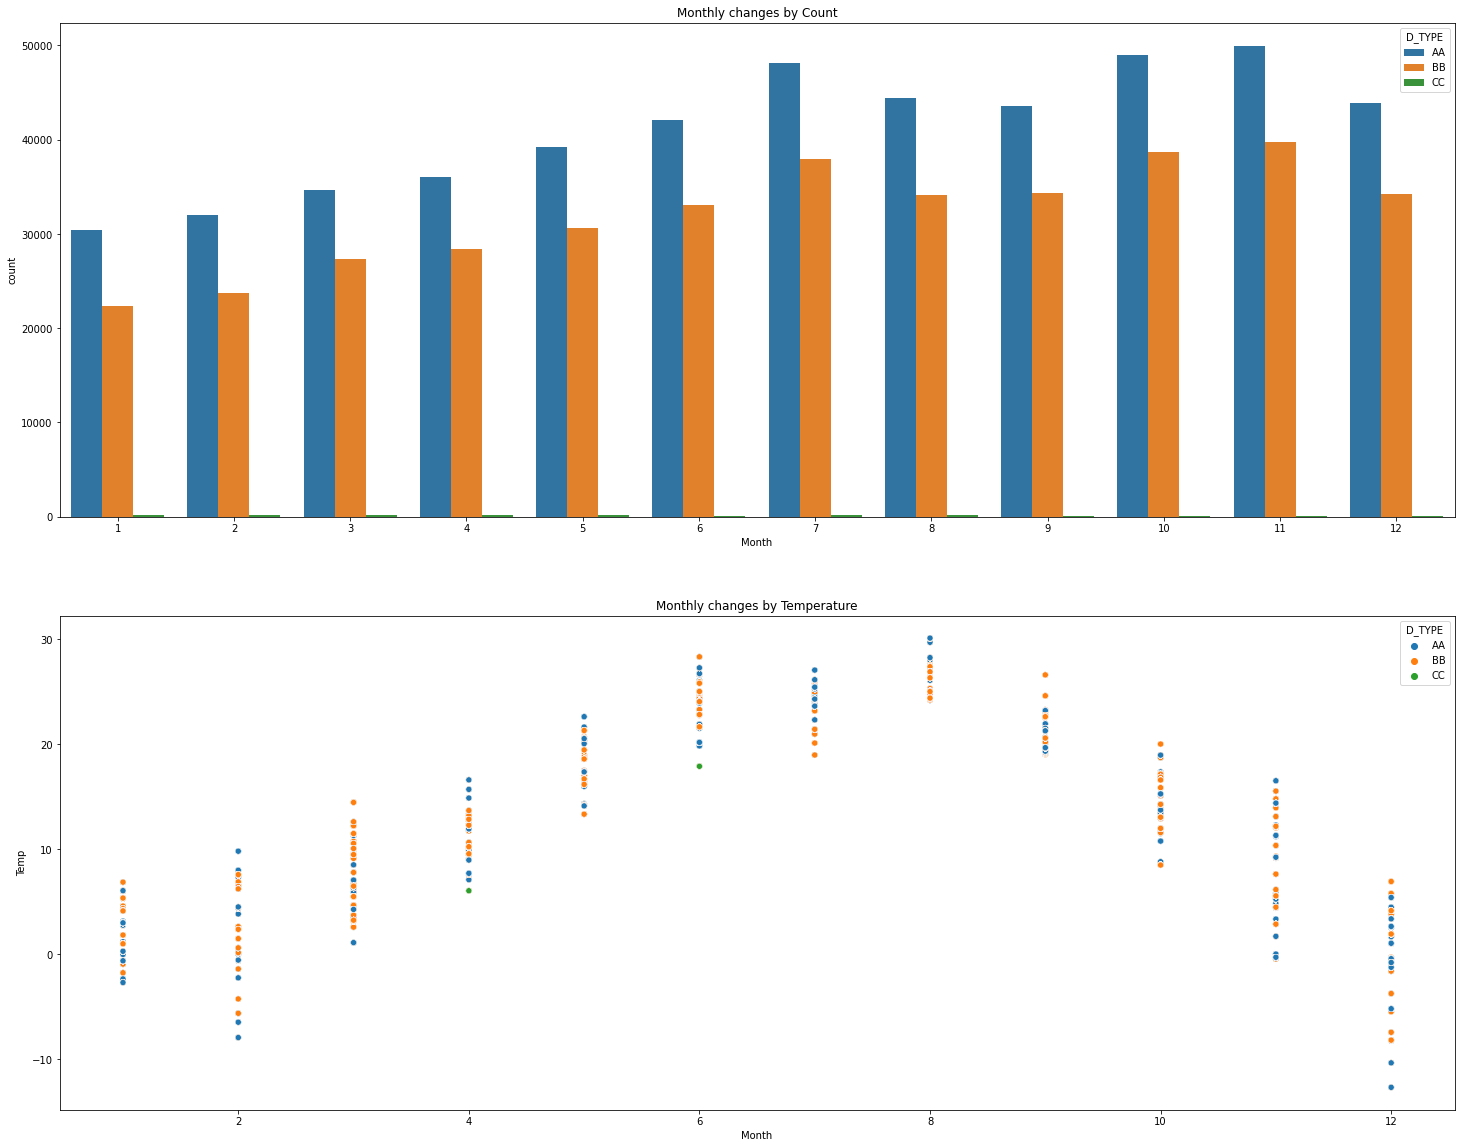

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(25,20)

sns.countplot(data=df, x='Month', hue='D_TYPE',ax=ax1).set(title='Monthly changes by Count')
sns.scatterplot(data=df, x="Month", y='Temp',hue="D_TYPE", ax=ax2).set(title='Monthly changes by Temperature')

#D_TYPE은 결제방법이라는 증명할 논리적 증거 부족

단지 7월까지 AA/BB의 상승후 8,9월 하락이후 10,11월 상승 후 12월 하락

---
#계절성을 비교하기 위해서 merge한 df를 활용

온도가 올라갈수로 AA의 결제 비중이 높아짐

결제방법였으면 온도가 올라가도 변화가 없어야 함

주차장의 종류일 가능성이 있을꺼 같음

In [ ]:
C_type = pd.DataFrame(parking_df[parking_df['D_TYPE']=='CC'])
C_type.duplicated(keep=False) # 중복 확인 후 제거

print(parking_df['COUNT'].value_counts())
print(C_type['COUNT'].value_counts())

1     863775
2      13519
3       1061
4        271
5        136
6         66
7         45
9         25
16        21
12        21
8         20
13        19
14        19
15        19
28        17
10        16
11        15
17        15
23        15
21        14
18        14
25        14
19        13
22         9
32         9
26         9
27         7
24         7
30         7
31         7
34         7
29         6
20         6
36         5
40         4
37         3
39         3
38         3
46         3
49         3
35         3
42         2
43         2
33         2
50         2
47         2
55         1
53         1
51         1
58         1
41         1
48         1
45         1
44         1
59         1
61         1
Name: COUNT, dtype: int64
1     1159
2       33
16      21
14      19
12      18
28      17
13      16
15      15
25      14
18      14
21      14
17      14
9       13
23      13
11      12
19      12
10      10
32       9
26       9
8        9
7        9
22       8
30  

USER_ID  JOIN_DATE   D_TYPE  STORE_ID  GOODS_TYPE  DATE        COUNT  AD1  Weekday  Month
1811081  2020-12-12  AA      109037    A           2020-12-17  7      J    3        12       1
999665   2018-12-16  CC      92457     A           2020-03-09  11     J    0        3        1
                             92437     A           2020-03-13  14     J    4        3        1
                                                   2020-03-16  14     J    0        3        1
                                                   2020-04-10  14     J    4        4        1
                                                                                            ..
                             190172    D           2020-04-25  17     YO   5        4        1
                             190223    A           2020-08-05  28     CY   2        8        1
                             190482    A           2020-09-11  25     GN   4        9        1
                             190483    A           2020

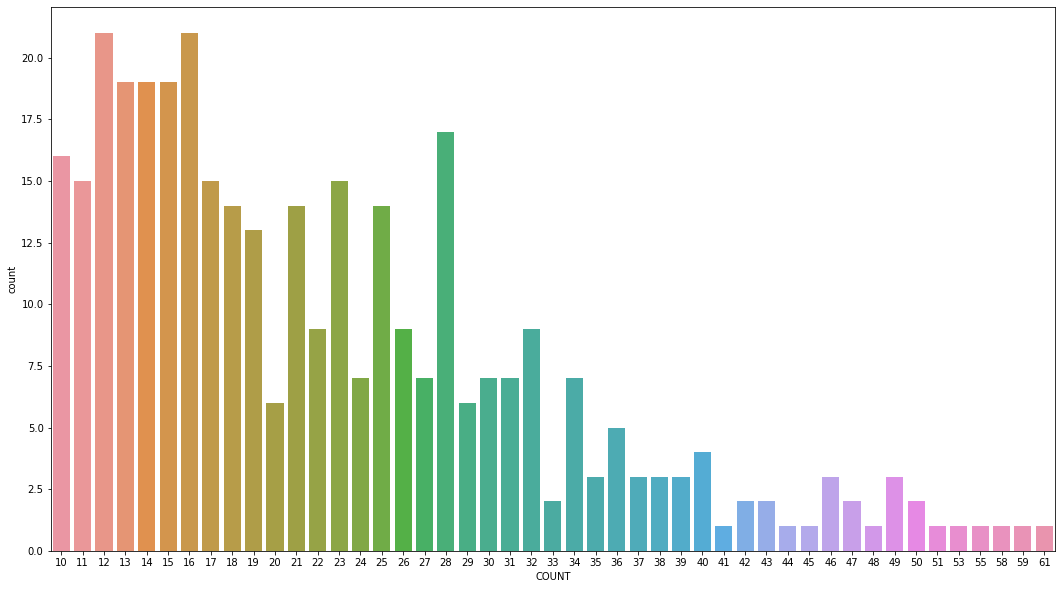

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(data=parking_df[parking_df['COUNT']>9], x="COUNT");
print(parking_df[parking_df['COUNT']>6].value_counts())

USER_ID  JOIN_DATE   D_TYPE  STORE_ID  GOODS_TYPE  DATE        COUNT  AD1  Weekday  Month
1493307  1970-01-01  CC      82433     D           2020-02-10  3      CY   0        2        1
999665   2018-12-16  CC      92403     A           2020-10-21  27     J    2        10       1
                                                   2020-06-22  14     J    0        6        1
                                                   2020-06-24  21     J    2        6        1
                                                   2020-06-26  22     J    4        6        1
                                                                                            ..
                             181777    C           2020-12-11  29     BF   4        12       1
                                                   2020-12-26  26     BF   5        12       1
                             181832    A           2020-01-03  7      SC   4        1        1
                             181833    C           2020

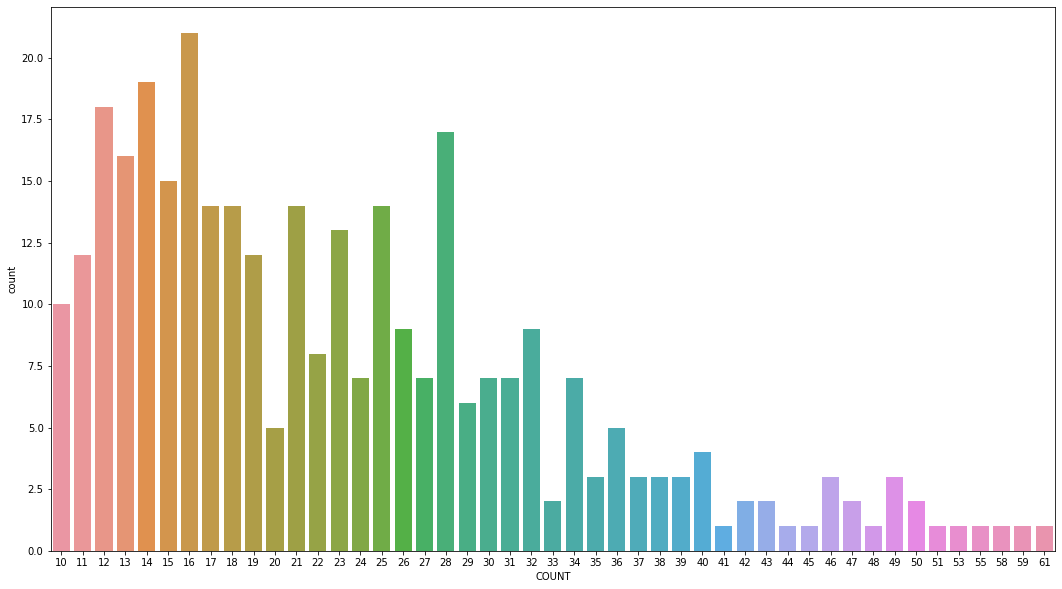

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(data=C_type[C_type['COUNT']>9], x="COUNT");
print(C_type[C_type['COUNT']>2].value_counts())

#parking_df['COUNT'] / CC타입만 추출한 C_type['COUNT']

카운팅 되는 수가 2자리 수 이후 비슷해서 비교를 위해서 9 이후 그래프로 비교

대부분 겹치는 경향이 보임

---

D_type은 카운트와 연관이 되어있는걸까???

In [ ]:
cc_1 = pd.DataFrame(parking_df[parking_df['JOIN_DATE']=='1970-01-01'])
cc_1.duplicated(keep=False)
cc_1

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD,2,1
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J,3,1
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO,3,1
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD,4,1
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP,4,1
...,...,...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR,5,12
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR,6,12
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD,6,12
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN,1,12


In [ ]:
cc_2 = pd.DataFrame(parking_df[parking_df['JOIN_DATE']=='2018-12-16'])
cc_2.duplicated(keep=False)
cc_2

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR,2,1
1525,999201,2018-12-16,AA,220655,B,2020-01-02,1,JRR,3,1
1526,999399,2018-12-16,BB,91885,A,2020-01-02,1,YD,3,1
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN,3,1
3120,999573,2018-12-16,AA,220440,A,2020-01-03,1,MP,4,1
...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,CC,2428,A,2020-12-27,17,CY,6,12
868847,999665,2018-12-16,CC,109267,A,2020-12-28,24,J,0,12
871562,999665,2018-12-16,CC,90193,C,2020-12-29,23,GW,1,12
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS,2,12


In [ ]:
cc_3 = pd.DataFrame(parking_df[parking_df['JOIN_DATE']=='2019-01-14'])
cc_3.duplicated(keep=False)
cc_3

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month
394,1036154,2019-01-14,BB,91628,A,2020-01-01,1,YC,2,1
395,1036321,2019-01-14,AA,220295,C,2020-01-01,1,MP,2,1
1561,1035776,2019-01-14,AA,220655,A,2020-01-02,1,JRR,3,1
3164,1035776,2019-01-14,AA,220836,A,2020-01-03,1,JRR,4,1
5084,1035854,2019-01-14,CC,182013,A,2020-01-04,1,MP,5,1
...,...,...,...,...,...,...,...,...,...,...
871599,1036467,2019-01-14,AA,230916,C,2020-12-29,1,JRR,1,12
874354,1035776,2019-01-14,AA,230213,A,2020-12-30,1,JRR,2,12
874355,1035801,2019-01-14,AA,230991,A,2020-12-30,1,J,2,12
874356,1035883,2019-01-14,AA,204547,A,2020-12-30,1,JRR,2,12


In [ ]:
cc_4 = pd.DataFrame(parking_df[parking_df['JOIN_DATE']=='2019-11-15'])
cc_4.duplicated(keep=False)
cc_4

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month
738,1392851,2019-11-15,BB,92437,A,2020-01-01,1,J,2,1
739,1393527,2019-11-15,BB,92510,A,2020-01-01,1,J,2,1
740,1393897,2019-11-15,AA,91853,A,2020-01-01,1,YD,2,1
2161,1392918,2019-11-15,BB,203847,B,2020-01-02,1,SC,3,1
2162,1392945,2019-11-15,AA,220722,A,2020-01-02,1,BF,3,1
...,...,...,...,...,...,...,...,...,...,...
874841,1393912,2019-11-15,AA,133167,A,2020-12-30,1,GSN,2,12
877587,1392712,2019-11-15,AA,220557,A,2020-12-31,1,YO,3,12
877588,1392847,2019-11-15,BB,182008,A,2020-12-31,1,J,3,12
877589,1392851,2019-11-15,BB,173209,D,2020-12-31,1,J,3,12


In [ ]:
cc_5 = pd.DataFrame(parking_df[parking_df['JOIN_DATE']=='2020-07-20'])
cc_5.duplicated(keep=False)
cc_5[cc_5['D_TYPE']=='CC']

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday,Month
787168,1631569,2020-07-20,CC,96266,A,2020-11-25,1,GN,2,11


# CC타입 JOIN_DATE와 연관이 있는지 확인

같은 날 CC타입만 있는게 아니라 AA / BB도 같이 있음

JOIN_DATE와 D_TYPE은 가입경로 연관성이 부족

In [ ]:
qwe = parking_df[parking_df['COUNT']>9]
qwe['USER_ID'].unique()

array([ 999665,  656252, 1467323, 1241334,  709657, 1544719, 1407822,
       1304663,  430741, 1635143, 1514190, 1675755, 1675314, 1105111,
       1572434, 1599008, 1613793, 1775410, 1660735])

카운트 수가 2자리수 이상일 때 D_TYPE에 연관이 있는지 다시 확인

In [ ]:
print(qwe[qwe['USER_ID']==999665])
print(qwe[qwe['USER_ID']==656252])
print(qwe[qwe['USER_ID']==1467323])
print(qwe[qwe['USER_ID']==1241334])
print(qwe[qwe['USER_ID']==1544719])
print(qwe[qwe['USER_ID']==1407822])
print(qwe[qwe['USER_ID']==1304663])
print(qwe[qwe['USER_ID']==430741])
print(qwe[qwe['USER_ID']==1635143])
print(qwe[qwe['USER_ID']==1514190])
print(qwe[qwe['USER_ID']==1675755])
print(qwe[qwe['USER_ID']==1675314])
print(qwe[qwe['USER_ID']==1105111])
print(qwe[qwe['USER_ID']==1572434])
print(qwe[qwe['USER_ID']==1599008])
print(qwe[qwe['USER_ID']==1613793])
print(qwe[qwe['USER_ID']==1775410])
print(qwe[qwe['USER_ID']==1660735])

        USER_ID  JOIN_DATE D_TYPE  STORE_ID  ... COUNT AD1  Weekday Month
1527     999665 2018-12-16     CC    104988  ...    11  GN        3     1
5034     999665 2018-12-16     CC    109223  ...    28  MP        5     1
6919     999665 2018-12-16     CC    104916  ...    14  GN        6     1
8390     999665 2018-12-16     CC    109423  ...    11   J        0     1
11552    999665 2018-12-16     CC     91992  ...    13  YD        2     1
...         ...        ...    ...       ...  ...   ...  ..      ...   ...
867260   999665 2018-12-16     CC      2428  ...    17  CY        6    12
868847   999665 2018-12-16     CC    109267  ...    24   J        0    12
871562   999665 2018-12-16     CC     90193  ...    23  GW        1    12
874317   999665 2018-12-16     CC    220797  ...    40  GS        2    12
877120   999665 2018-12-16     CC    220893  ...    42   J        3    12

[328 rows x 10 columns]
       USER_ID  JOIN_DATE D_TYPE  STORE_ID  ... COUNT AD1  Weekday Month
22386   656252

사실상 USER_ID 999665 때문에 CC타입의 2자리수에 영향을 줌

999665을 제외한 다른 USER들은 CC는 없음

In [ ]:
parking_1 = parking_df[parking_df['USER_ID']!=999665]
print(parking_1['COUNT'].value_counts())

1     863775
2      13519
3       1060
4        271
5        133
6         63
7         36
9         12
8         11
10         6
15         4
11         3
12         3
13         3
23         2
22         1
17         1
19         1
20         1
Name: COUNT, dtype: int64


# D_TYPE 컬럼 비교


1.   USER_ID 같은 USER_ID는 D_TYPE이 동일함

2.   JOIN_DATE CC인 user와 AA / BB  user가 같이 섞여있음

3.   STORE_ID 같은 STORE_ID인데 CC인 user와 AA / BB가 같이 섞여있음

4.   GOODS_TYPE A,B,C,D 골고루 나옴

5.   DATE 날짜가 제각각임

6.   COUNT CC의 count를 보면 1,2카운트 이후 2자리수 카운트숫자와 

 전체 count 2자리수 카운트숫자랑 비슷 --> 999665으로 인해 제대로 된 분석 아님

7.   AD1 연관이 없음 AD1 1개인 user도 있고 AD1가 다수인 user도 있음

---
USER_ID / STORE_ID가 둘다 D_TYPE에 count가 상승

온도에 따라 AA/BB/CC 변화

어플에서 주차장 종류로 민영 공영 공유 주차장일 가능성도 있음



# J / GN / JRR / SC / MP 지역명을 약자로 적은것 같음 

중구 강남구 종로구 서초구 마포구 등등

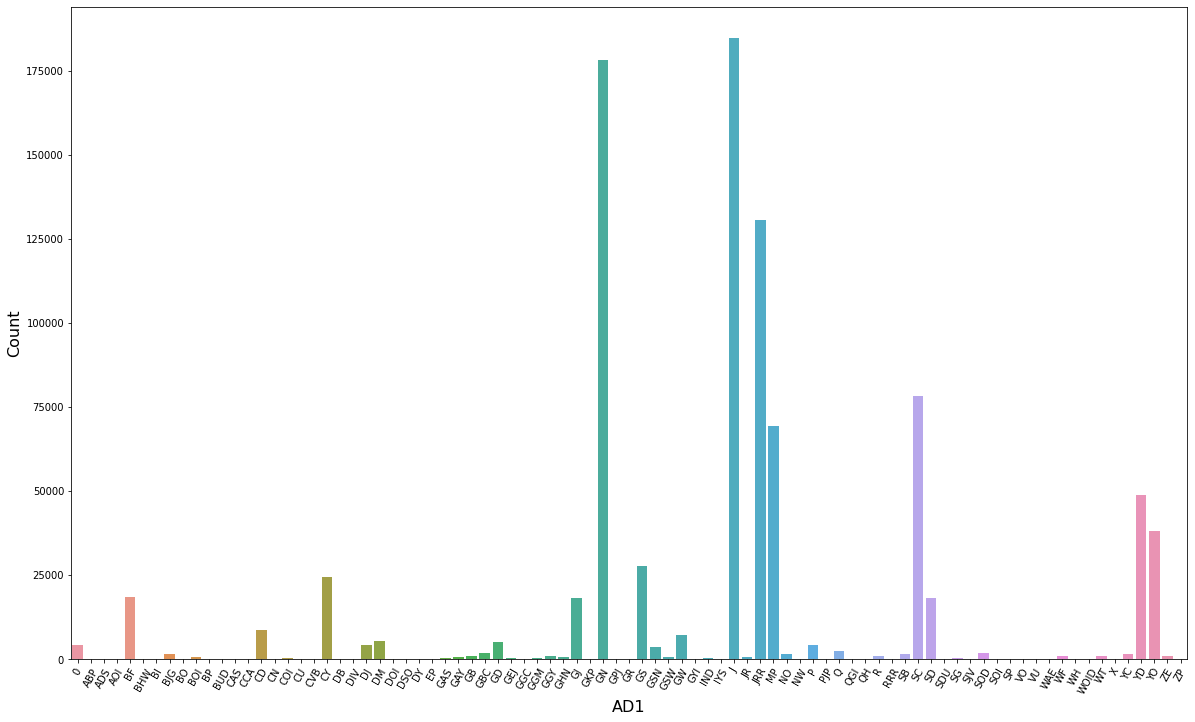

J      179383
GN     172967
JRR    126586
SC      75856
MP      67819
YD      47686
YO      37171
GS      26869
CY      23376
BF      18035
GJ      17938
SD      17768
CD       8535
GW       7053
DM       5131
GD       4989
P        4345
0        4225
Name: AD1, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


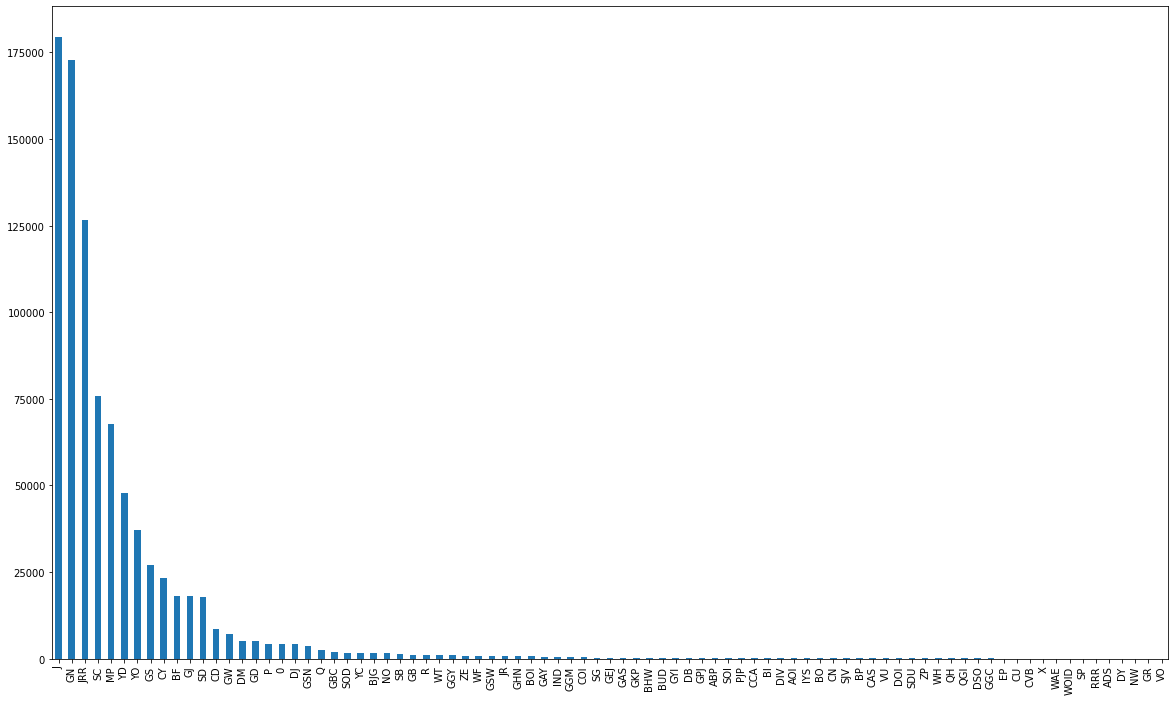

In [ ]:
# AD1별 결제건수 시각화
plt.figure(figsize=(20,12))
sns.barplot(x=parking_df.groupby("AD1")["COUNT"].sum().keys(), y=parking_df.groupby("AD1")["COUNT"].sum())
plt.ylabel('Count', fontsize=16)
plt.xlabel('AD1', fontsize=16)
plt.xticks(rotation=60)
plt.show()

#AD1 컬럼 분포 확인
ad1_df=parking_df['AD1'].value_counts()
plt.figure(figsize=(20,12))
print(ad1_df.head(18))
print(ad1_df.plot.bar())

In [ ]:
ad1 = pd.DataFrame(parking_df.groupby(['AD1','STORE_ID','Weekday']).count())
ad1.duplicated(keep=False) # 중복열 확인 및 제거
ad1['COUNT']

AD1  STORE_ID  Weekday
0    157708    0          21
               1          15
               2          25
               3          25
               4          49
                          ..
ZP   220973    5           6
               6           3
     221040    0           5
               2           1
               4           1
Name: COUNT, Length: 5639, dtype: int64

In [ ]:
mon_df = parking_df[parking_df['Weekday']==0]
mon_df= mon_df[['COUNT','AD1','Weekday']]

wed_df = parking_df[parking_df['Weekday']==2]
wed_df = wed_df[['COUNT','AD1','Weekday']]

fri_df = parking_df[parking_df['Weekday']==4]
fri_df = fri_df[['COUNT','AD1','Weekday']]

sat_df = parking_df[parking_df['Weekday']==5]
sat_df = sat_df[['COUNT','AD1','Weekday']]

sun_df = parking_df[parking_df['Weekday']==6]
sun_df = sun_df[['COUNT','AD1','Weekday']]

[Text(0.5, 1.0, 'Fri_AD1')]

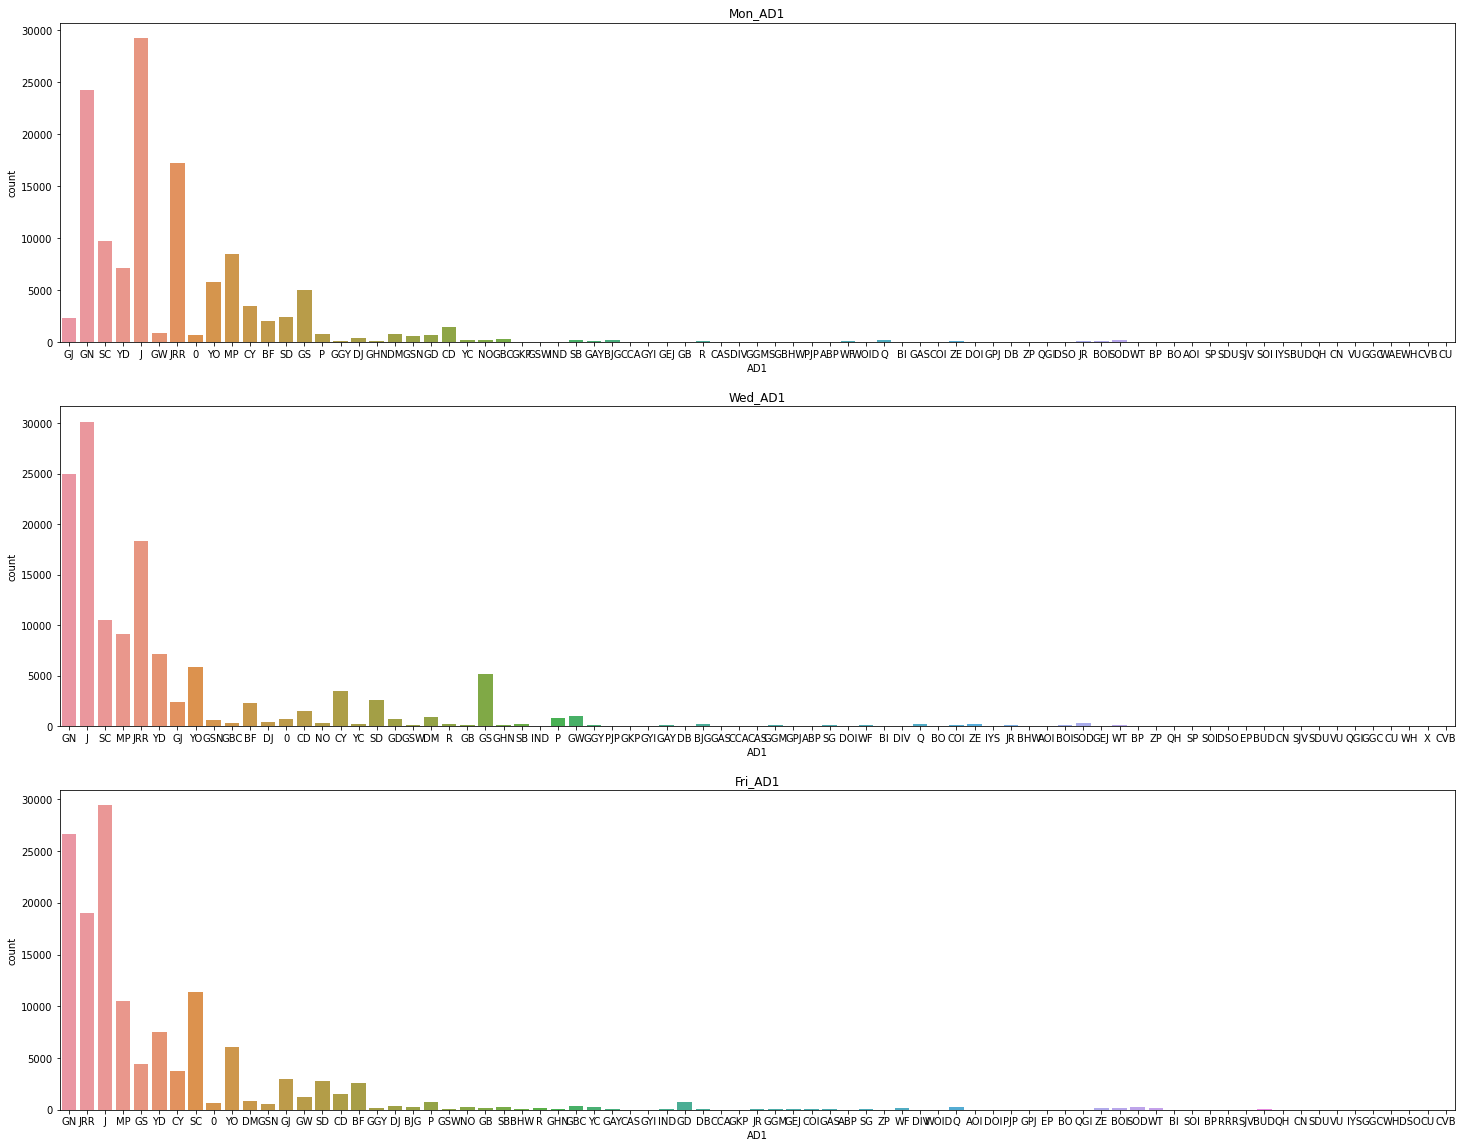

In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(25,20)

sns.countplot(data=mon_df, x='AD1', ax=ax1).set(title='Mon_AD1')
sns.countplot(data=wed_df, x='AD1', ax=ax2).set(title='Wed_AD1')
sns.countplot(data=fri_df, x='AD1', ax=ax3).set(title='Fri_AD1')


[Text(0.5, 1.0, 'Sun_AD1')]

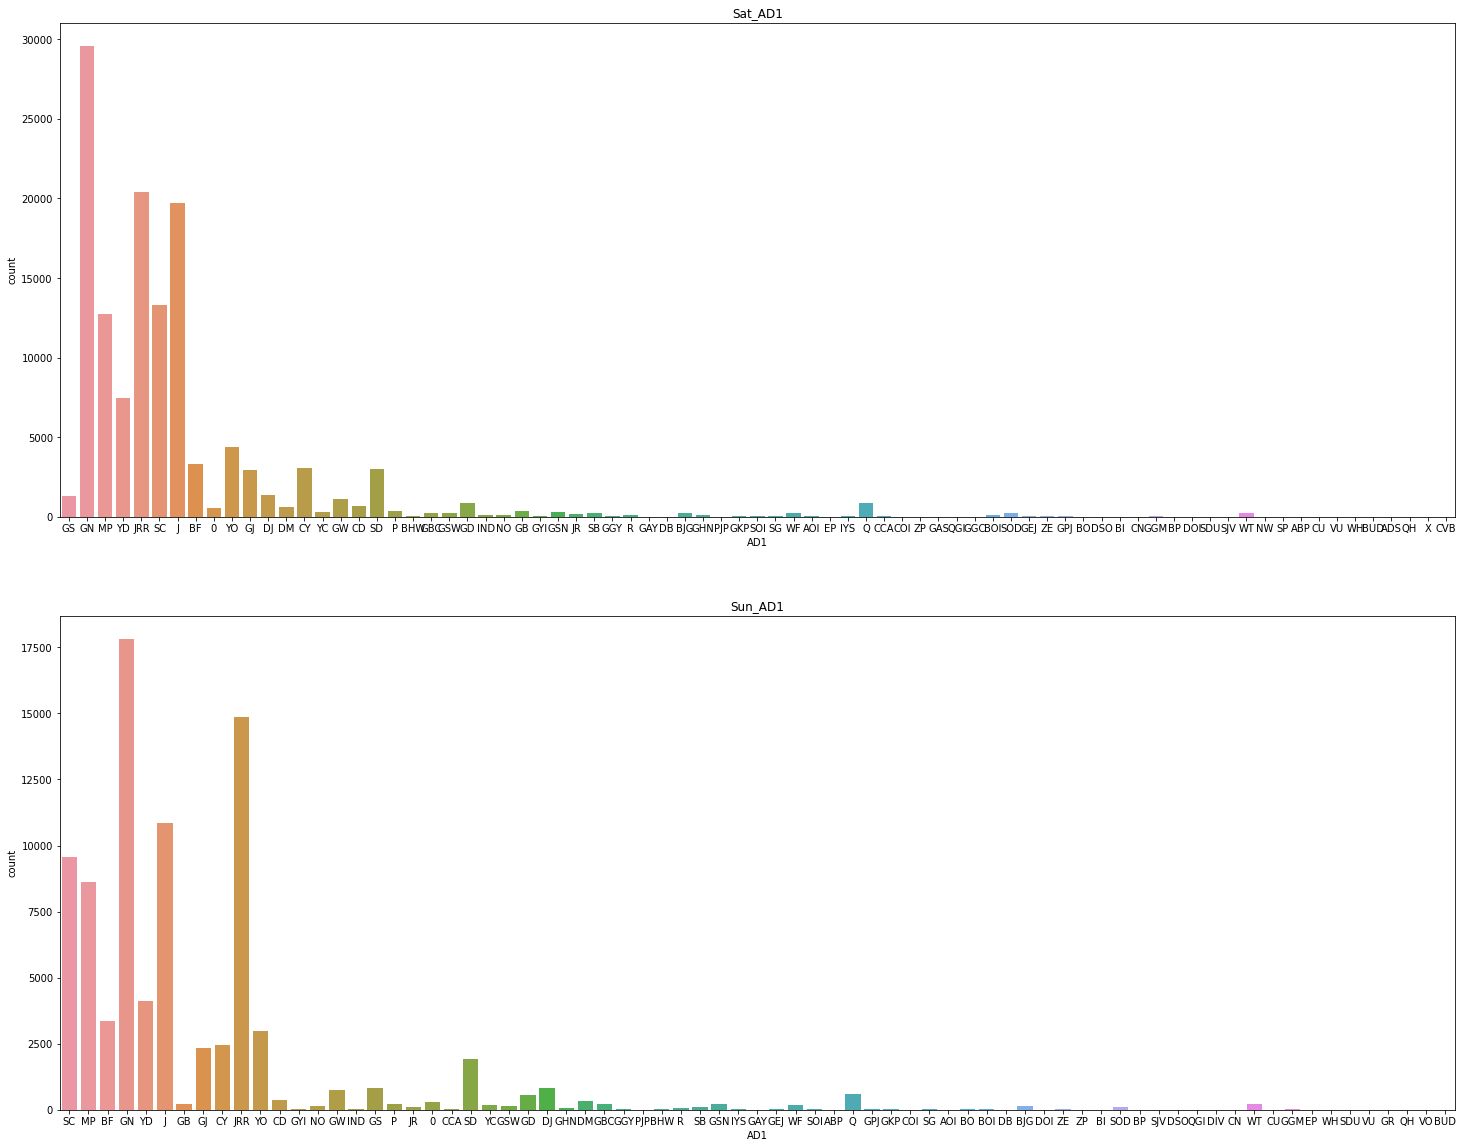

In [ ]:
figure, (ax4, ax5) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(25,20)

sns.countplot(data=sat_df, x='AD1', ax=ax4).set(title='Sat_AD1')
sns.countplot(data=sun_df, x='AD1', ax=ax5).set(title='Sun_AD1')

#평일 월수금 주말 나눠서 분석


1.   평일 J 1위 주말 3위 --> 평균 값 평일: 30000 주말: 17000

2.   평일 GN 2위 주말 1위 --> 평균 값 평일: 25000 주말: 23000

3.   평일 JRR 3위 주말 2위 --> 평균 값 평일: 17000 주말: 17000

4.   평일 SC 4위 주말 4위 --> 평균 값 평일: 10000 주말: 10000

5.   평일 MP 5위 주말 5위 --> 평균 값 평일: 9000 주말: 10000

6.   평일 YD 6위 주말 6위 --> 평균 값 평일: 7000 주말: 5000


---
# AD1 지역을 의미할 가능성이 높음



# 모두의 주차장 홈페이지에서 예시 

평일 당일권 / 3시간권(시간은 주차장마다 다름) / 평일 심야권 / 휴일 당일권 이렇게 예시를 들고 있음

Goods type으로 주차권 타입이 가능성이 높음

In [ ]:
parking_df['GOODS_TYPE'].value_counts()

A    609790
C    131163
B    118541
D     19777
Name: GOODS_TYPE, dtype: int64

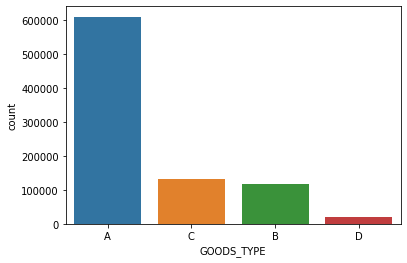

In [ ]:
sns.countplot(data=parking_df, x='GOODS_TYPE');

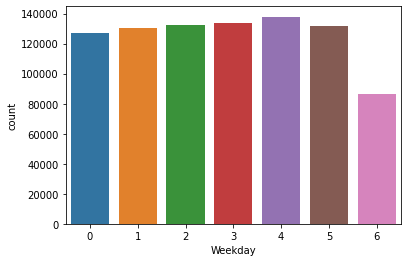

In [ ]:
sns.countplot(data=parking_df, x='Weekday');

In [ ]:
parking_df.groupby('Weekday')['GOODS_TYPE'].value_counts()

Weekday  GOODS_TYPE
0        A             89099
         B             16993
         C             16733
         D              4227
1        A             89400
         B             20744
         C             17489
         D              3048
2        A             89360
         B             21586
         C             18231
         D              3108
3        A             89246
         B             22793
         C             18291
         D              3286
4        A             86662
         B             27847
         C             19913
         D              3495
5        A             99048
         C             24413
         B              6218
         D              1801
6        A             66975
         C             16093
         B              2360
         D               812
Name: GOODS_TYPE, dtype: int64

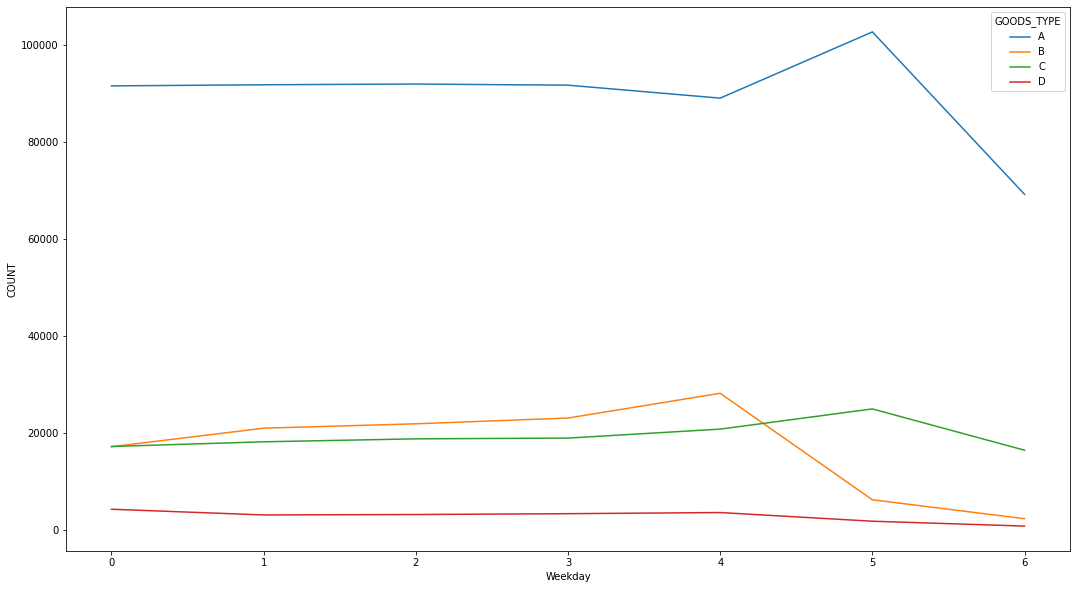

In [ ]:
counts_week = parking_df.groupby(['Weekday','GOODS_TYPE'])['COUNT'].sum().reset_index()
counts_weekday = counts_week[['Weekday','GOODS_TYPE','COUNT']]
plt.figure(figsize=(18,10))
sns.lineplot(x = 'Weekday', y = 'COUNT', hue = 'GOODS_TYPE', data = counts_weekday);

# 요일 비교로 GOODS_TYPE 구분



1.   주말에 C가 증가하는걸 보면 C는 휴일 당일권일 가능성이 높음

2.   주말에 D가 감소하는걸 보면 D는 평일 심야권일 가능성이 높음

3.   주말에 B가 감소하는걸 보면 B는 평일 당일권일 가능성이 높음

4.   남은 A는 시간권일 가능성이 높음


---

# 요일 카운터로 비교

금요일까지 증가하다가 주말에 감소하는 경향이 보임


# USER_ID  & STORE_ID 분석

*   하루에 다중 결제를 판별 1개의 아이디를 공유하는 지 파악

*   결제를 여러번한 유저 확인 후 등급 나누기

*   COUNT가 많은 STORE 확인 후 등급 나누기


In [ ]:
# 충성도 높은 유저 찾기

user_df = parking_df.sort_values(['USER_ID','JOIN_DATE']).reset_index(drop=True)
user_df['Rating'] = ''
user_df['Rating'][user_df['COUNT']==1] = 'Bronze' 
user_df['Rating'][(user_df['COUNT']>1) & (user_df['COUNT']<=3)] = 'Silver'
user_df['Rating'][(user_df['COUNT']>3) & (user_df['COUNT']<=5)] = 'Gold'
user_df['Rating'][(user_df['COUNT']>5) & (user_df['COUNT']<=7)] = 'Platinum'
user_df['Rating'][(user_df['COUNT']>7) & (user_df['COUNT']<=9)] = 'Diamond'
user_df['Rating'][user_df['COUNT']>9] = 'VIP'

user_df['Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

Bronze      863775
Silver       14580
Gold           407
VIP            353
Platinum       111
Diamond         45
Name: Rating, dtype: int64

In [ ]:
# 하루에 다중결제를 하는 유저찾기
user_mul = user_df[user_df['Rating'] != 'Bronze']

use = user_mul.groupby(['DATE','COUNT'])['USER_ID'].sum().reset_index()
use

,DATE,COUNT,USER_ID
0,2020-01-01,2,6146576
1,2020-01-01,6,999665
2,2020-01-02,2,26475345
3,2020-01-02,3,2427808
4,2020-01-02,11,999665
...,...,...,...
1489,2020-12-31,2,52554289
1490,2020-12-31,3,9388523
1491,2020-12-31,4,1811081
1492,2020-12-31,5,709657


In [ ]:
# 결제율이 좋은 STORE 찾기

store_df = parking_df.groupby('STORE_ID')['COUNT'].sum().reset_index()

store_df['Rating'] = ''
store_df['Rating'][store_df['COUNT']==1] = 'Bronze' 
store_df['Rating'][(store_df['COUNT']>1) & (store_df['COUNT']<=5)] = 'Silver'
store_df['Rating'][(store_df['COUNT']>5) & (store_df['COUNT']<=9)] = 'Gold'
store_df['Rating'][(store_df['COUNT']>9) & (store_df['COUNT']<=15)] = 'Platinum'
store_df['Rating'][(store_df['COUNT']>15) & (store_df['COUNT']<=20)] = 'Diamond'
store_df['Rating'][store_df['COUNT']>20] = 'VIP'

store_df['Rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value

VIP         709
Silver      139
Gold         68
Bronze       63
Platinum     49
Diamond      33
Name: Rating, dtype: int64